
# Lone Approval Prediction

The aim of this project is the loan will approved by the bank by analysis of the some parameter like loan amount , cibil score 
asset and many other variables. From this project we will analysis the factors thats affect on the loan can be approved or not 
and we also predict loan status for new applicable.



# About the dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features

# Data Dictionary



loan_id=Unique loan ID

no_of_dependent=Number of dependents of the applicant

education=Education level of the applicant

self_employed=If the applicant is self-employed or not

income_annum=Annual income of the applicant

loan_amount=Loan amount requested by the applicant

loan_tenure=Tenure of the loan requested by the applicant (in Years)

cibil_score=CIBIL score of the applicant

residential_asset_value=Value of the residential asset of the applicant

commercial_asset_value=Value of the commercial asset of the applicant

luxury_asset_value=Value of the luxury asset of the applicant

bank_assets_value=Value of the bank asset of the applicant

loan_status=Status of the loan (Approved/Rejected)


In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data preprocessing

In [4]:
# cheking the shape of the dataset
df.shape

(4269, 13)

In [5]:
df.drop(columns = 'loan_id',inplace=True)

In [6]:
# cheking for null/missing values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# cheking the datatypes of the columns
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

The dataset has 4 kinds of assests that are - Residential, Commericial, Luxury and Bank. I am categorizing these assets in to two category i.e. Movable and Immovable assets. The Residential and Commericial assest would be added to the Immovable assets and Luxury and Bank assets would be added to the Movable assets.

In [8]:
df[' Movable']= df[' bank_asset_value'] + df[' luxury_assets_value']
df[' Immovable']= df[' residential_assets_value'] + df[' commercial_assets_value']

In [9]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value',' residential_assets_value',' commercial_assets_value'] , inplace = True)

Descriptive Statistics

In [41]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable,Immovable
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [11]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable,Immovable
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


# Exploratory Data Analysis

#In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

Number of Dependents 

Text(0.5, 1.0, 'Number of Dependents')

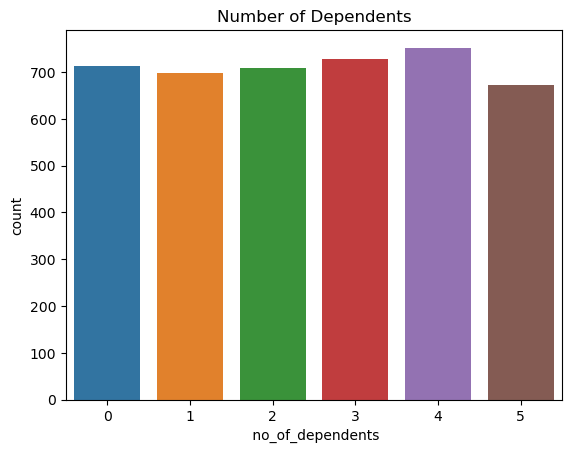

In [14]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

this graph show the number of dependent on loan applicant. In this graph there is no more different in the number of dependents Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

 Education and Income 

<Axes: xlabel=' education', ylabel=' income_annum'>

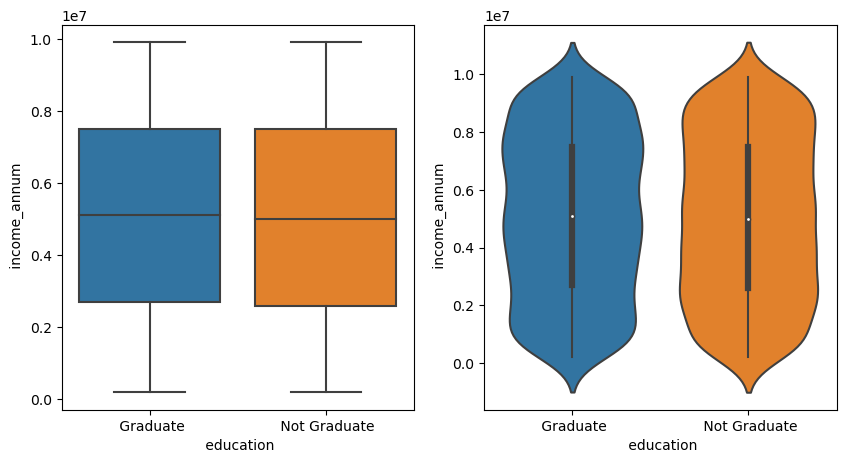

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graph show boxpolt and volinplot show education of applicant on there income. The boxplot show a graduate and not 
graduate applicant has nearly same income and the volinplot show distribution of income of Graduate and not graduate applicant.
we can see there is not graduate applicant have distribustion of 2000000 to 8000000 and there is the distribution of graduate 
have more applicant having income 6000000 to 8000000 and from there graduate and not graduate having nearly same income thats why,
i assume there education is not play a major role in this loan approval 

Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

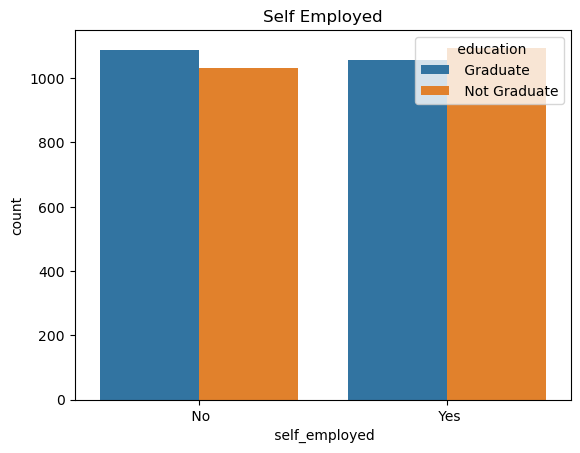

In [24]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

this graph show the number of self_employed applicant along there education . From these graph we see the majority of graduate 
are not self employed either the not graduate are self_employed. this means graduate applicants are more likely to salaried 
employed and non graduate are more likely as self_employed. this facotrs has affecting on the loan approval because the salaried 
employed have satble income and hence they more likely pay back loan as compare the self_employed peoples, whos income is not stable
but it possible when the self_employed applicant are earning high then salried employed, hence the posibilty of the pay back loan 
is high and thats why this is the important factor for the loan approval 



Lone Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

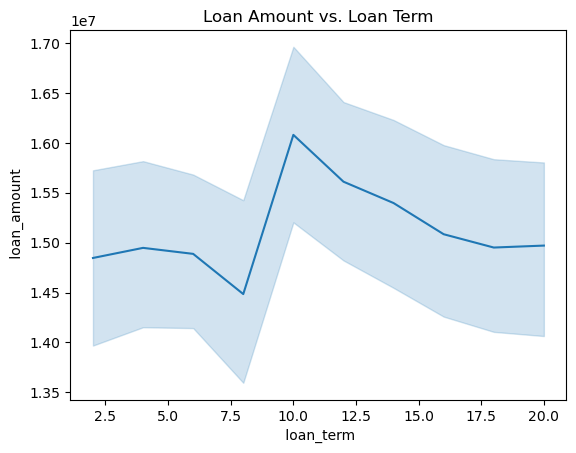

In [25]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

This lineplot show the reletion between the loan term and the loan amount. Between the loan 2.5 - 7.5 year the loan amount 
between 1400000 to 1550000 . However the loan amount is higher for 10 year

 CIBIL Score Distribution 

<Axes: xlabel=' cibil_score', ylabel='Count'>

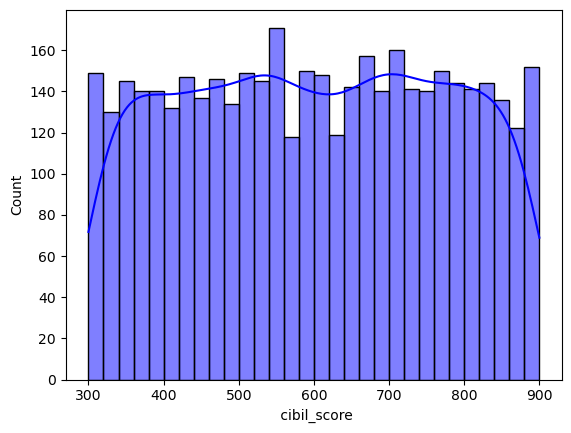

In [39]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'blue')

*Cibil score and there meaning which type of score is good poor and bad 

Cibil Score	Meaning

300-549	Poor

550-649	Fair

650-749	Good

750-799	Very Good

800-900	Excellent



from the above histplot we will see the most of the people has cibil score is 640 and which affecting on their loan application.
and those people has cibil score is greter than 640 is which is good sign for the loan approval. and the banks also target the peoples 
and provide the service like loan and other things and banks also provide some special facility to the higher cibil score preson 
the i assume the applicat having the cibil score greater than 640 those have more probabilty there loan has approved thats why 
cibil socore has make important factor in this loan appraval

<Axes: xlabel=' Immovable', ylabel='Count'>

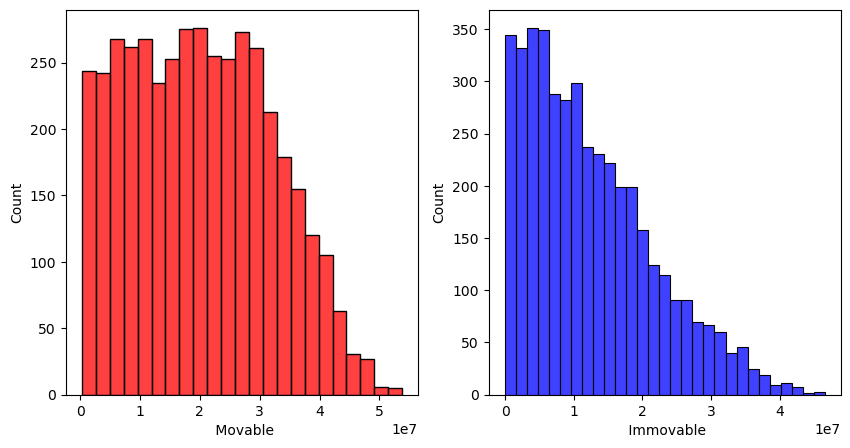

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[' Movable'], ax=ax[0], color='red')
sns.histplot(df[' Immovable'], ax=ax[1], color='blue')

From the both hist plot we see the asset play the main role in loan approval. The asset provide the security to the bank that the 
person repay the loan. i mention above the categorized them in movable and immovable assets. The graph show the distrunution of 
the movable and immovable asset in dataset.
majority of applicant have less than 30 million and there is slight trend of decreasing number of applicant as the movable asset
increase.
Coming to the immovable asset Which contain Ressidental asset, commercial asset, mojority of applicants have less than 15 million 
immovalble asset and there is strong trend to decreasing number of applicant in immovable asset, increase after 20 million.

Till now in the EDA, I have explored the distribution of data across the various features as well as relationship between the some of the variables as well and made some assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I will be looking at the visualization of the relation between the independent variables and the target variable.

*Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

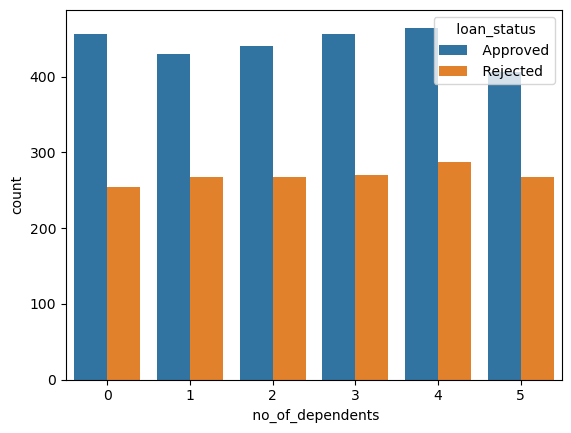

In [57]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents. But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis. But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

Annual income VS loan Status

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

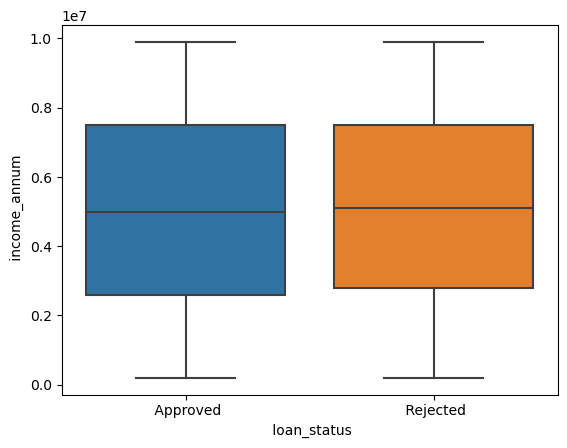

In [58]:
sns.boxplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income

Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

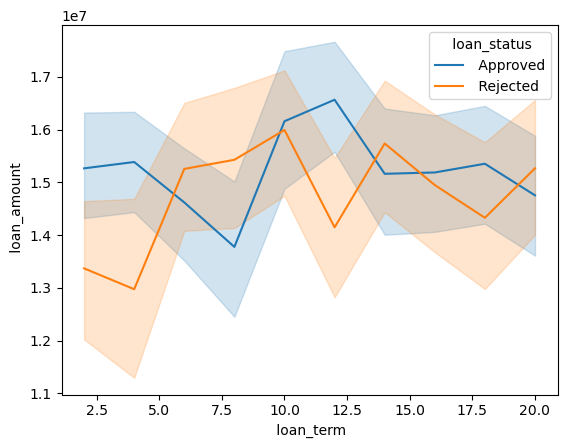

In [45]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

CIBIL score vs loan status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

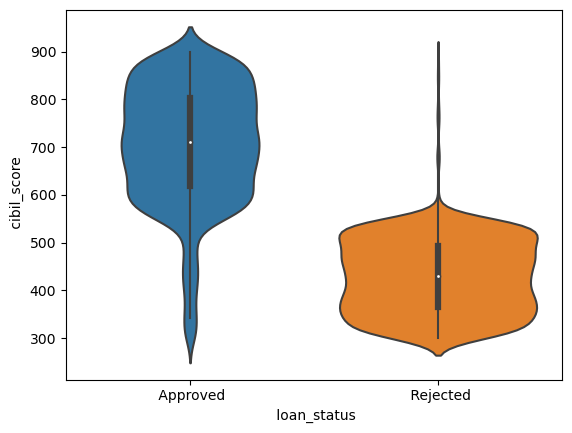

In [48]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

from the above we will clearly see the people having low cibil score the loan application will rejected and the people having cibil
score is higher the 600 there loan application will be approve thats why i think the cibil score play the important factor in the
loan approval application 

 *Asset vs loan_status

<Axes: xlabel=' Immovable', ylabel='Count'>

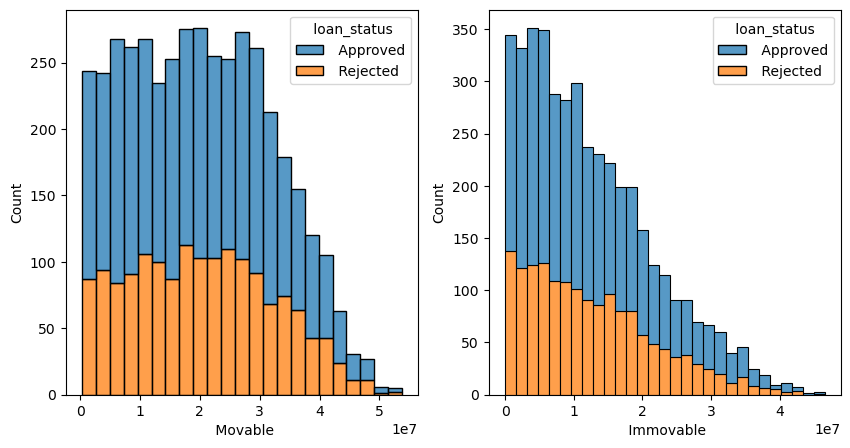

In [52]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = ' Movable', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  ' Immovable', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

As we know the assets are providing the security to the bank for which the loan is issued. These two graph show the reletion between the movable and immovable assets along with the loan status. The both graph shows that, with increase in assets the chances of loan approval is increase and the chances of rejection in decrease. The graph also shows that, the movable assets are more thean the immovable assets.

# Data Preprocessing 2

Label incoding the categorical variabels

In [53]:
# label incoding 
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [54]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable,Immovable
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


# Coorelation Matrix Heatmap

<Axes: >

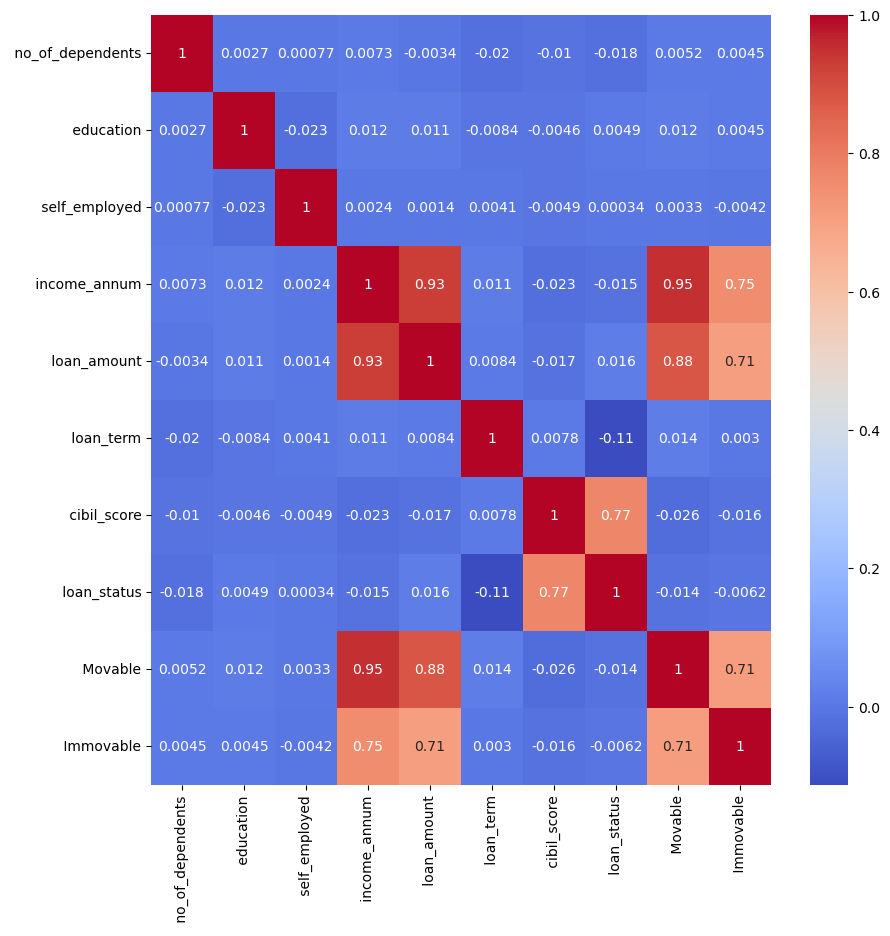

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:

1.Movable Assets and Immovable Assets

2.Income and Movable Assets

3.Income and Immovable Assets

4.Movable Assets and Loan Amount

5.Immovable Assets and Loan Amount

6.Loan Status and Cibil Score

7.Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both come under assets and its that person with more movable assets will have more immovable assets and vice versa. same with income and movables and immovables assets. The person with greter income wil have greter assets

Assets Vs Loan Amoun

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

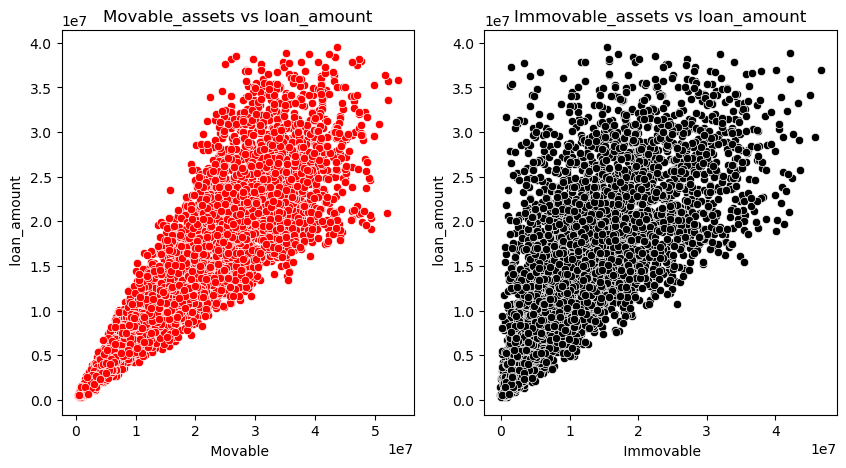

In [60]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x=' Movable', y = ' loan_amount', data = df, ax=ax[0],color = 'red').set_title('Movable_assets vs loan_amount')
sns.scatterplot(x=' Immovable', y = ' loan_amount', data = df, ax=ax[1],color = 'black').set_title('Immovable_assets vs loan_amount')

From the above graph we see the loan amount has positive relation with movable and immovable assets. The more the assets, the more the loan amount is issued by the bank

Loan Amount Vs Income

Text(0.5, 1.0, 'Loan Amount VS Income')

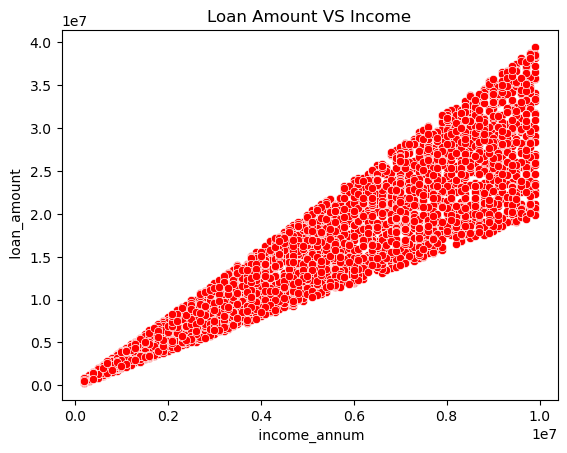

In [65]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df,color = 'red').set_title('Loan Amount VS Income')

from this graph we will clearly see the higher the income, the higher the loan amount. this is because the applicant income is the main factor in deciding the how much loan needed.

# Train Test Split 

In [66]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

# Model Bulding 

We will using the following machine learning model to predict the loan approval status

1) Random Forest Classifier 

2) Desicion Tree Classifier 

# 


1) Random Forest Classifier 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
RC = RandomForestClassifier()

In [74]:
RC.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
# traning accuracy
RC.score(X_train,y_train)

1.0

In [78]:
# predict the loan approval status
RC_pred = RC.predict(X_test)






2.Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
DT = DecisionTreeClassifier()

In [81]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
# training accuracy
DT.score(X_train,y_train)

1.0

In [82]:
# predict the loan approval status
DT_pred = DT.predict(X_test)

# Distribution Plot

C:\Users\cheta\AppData\Local\Temp\ipykernel_11112\3500003034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\cheta\AppData\Local\Temp\ipykernel_11112\3500003034.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

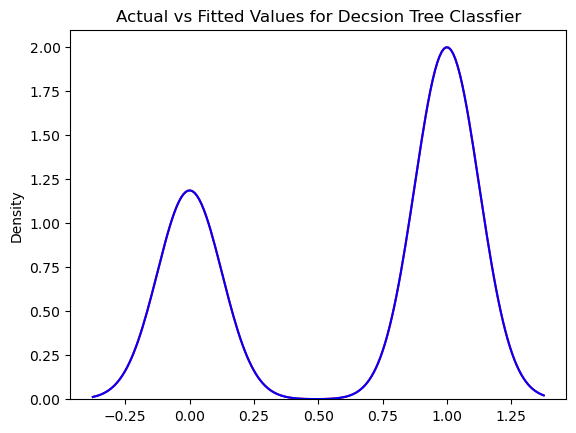

In [90]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = DT_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\cheta\AppData\Local\Temp\ipykernel_11112\2199054660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "b", label = "Actual Value")
C:\Users\cheta\AppData\Local\Temp\ipykernel_11112\2199054660.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

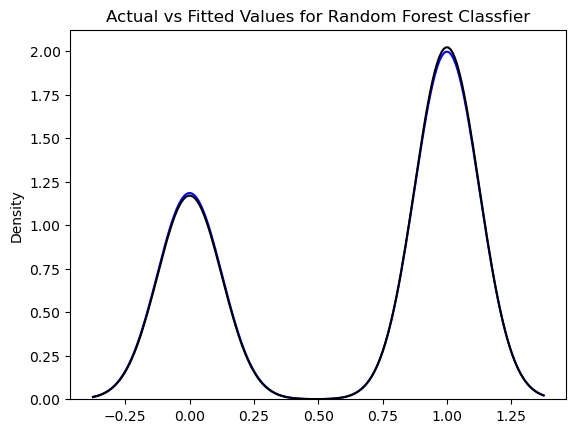

In [94]:
ax = sns.distplot( x = y_test, hist = False, color = "b", label = "Actual Value")
sns.distplot( x = RC_pred, hist = False, color = "k", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

The distribution plot of both the models are almost same. There is very minor difference in the distribution desity of the predicted and actual values in the random forest classifer and in case of decision tree classifier, the distribution density of the predicted values clearly overlaps with the actual value from that we can say the decisoin tree classifier is a better model than the random forest classifer for this perticular dataset. 

1.Classification Report of Random Forest Classifier

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,RC_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



2.Classification Report of Decision Tree Classifier

In [97]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Random Forest Classifier

In [102]:
print('R2 score: ', r2_score(y_test, RC_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, RC_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, RC_pred))

R2 score:  0.8947831596733314
Mean Squared Error:  0.02459016393442623
Mean Absolute Error:  0.02459016393442623


 Decision Tree Classifier

In [103]:
print('R2 score: ', r2_score(y_test, DT_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, DT_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, DT_pred))
print('\n')


R2 score:  0.9198347883225382
Mean Squared Error:  0.01873536299765808
Mean Absolute Error:  0.01873536299765808




From all the metrics,graphs and reports.i conclude the decision tree classifier is the better machine learning model to loan approval 
status of a person.




# Conclusion

From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:
    
1) CIBIL Score :- People with the higher CIBIL score has higher chance for loan approval.
2) Assets :- People which have more assets have higher chance for loan aopproval.
3) Number of Dependents: People with more number of dependents have less chances of loan approva
4) Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval

About the machine learning models. i used Desion tree classifier and the Random forest classifier and both the models have give 
a excellent result having accuries = 91.4% and 89.4% But the decision tree classifier give better result than random forest classifier